In [4]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import patsy as pt
import scipy.stats as st
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/penguins.csv")

In [6]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [7]:
dfu = df.dropna(subset = ["flipper_length_mm", "body_mass_g"])

In [8]:
y, X = pt.dmatrices("body_mass_g ~ flipper_length_mm", data = dfu)

In [9]:
def lm(theta, X):
    N = np.shape(X)[0]
    lm = np.zeros(N)
    for n in range(N):
        lm[n] = np.sum(theta * X[n, :])
    return lm
    
def mse(y, yhat):
    d = y - yhat
    return np.mean(d * d)
    
def normal_ll(theta, data):
    y = data["y"]
    X = data["X"]
    yhat = lm(theta, X)
    return mse(y, yhat)

In [11]:
rng = np.random.default_rng()
o = minimize(normal_ll, rng.normal(size = 2), args = ({"y": y[:, 0], "X": X},))
beta = o.x
beta

array([-5780.80244506,    49.6854232 ])

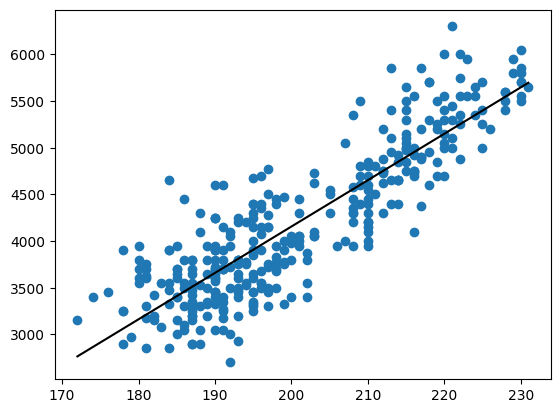

In [7]:
x = np.linspace(np.min(df["flipper_length_mm"]), np.max(df["flipper_length_mm"]), 301)
y = beta[0] + beta[1] * x
plt.scatter(df["flipper_length_mm"], df["body_mass_g"])
plt.plot(x, y, color = "black");

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/carnivora.csv")

In [13]:
df.columns

Index(['Order', 'SuperFamily', 'Family', 'Genus', 'Species', 'FW', 'SW', 'FB',
       'SB', 'LS', 'GL', 'BW', 'WA', 'AI', 'LY', 'AM', 'IB'],
      dtype='object')

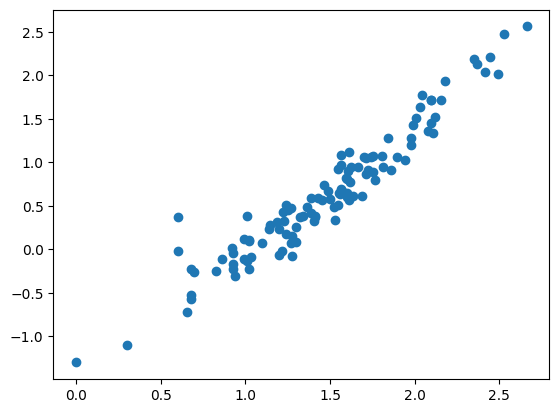

In [19]:
# plt.scatter(df["SB"], df["SW"]);
plt.scatter(np.log10(df["SB"]), np.log10(df["SW"]));

In [26]:
y, X = pt.dmatrices("np.log10(SW) ~ np.log10(SB)", data = df)

In [27]:
rng = np.random.default_rng()
o = minimize(normal_ll, rng.normal(size = 2), args = ({"y": y[:, 0], "X": X},))
beta = o.x
beta

array([-1.43944428,  1.40795283])

In [29]:
R = 100
N = np.shape(X)[0]
betas = np.zeros(shape = (R, 2))
for r in range(R):
    idx = rng.integers(N, size = N)
    o = minimize(normal_ll, rng.normal(size = 2), args = ({"y": y[idx, 0], "X": X[idx]},))
    betas[r] = o.x

In [31]:
np.std(betas, axis = 0)

array([0.08500842, 0.0535167 ])

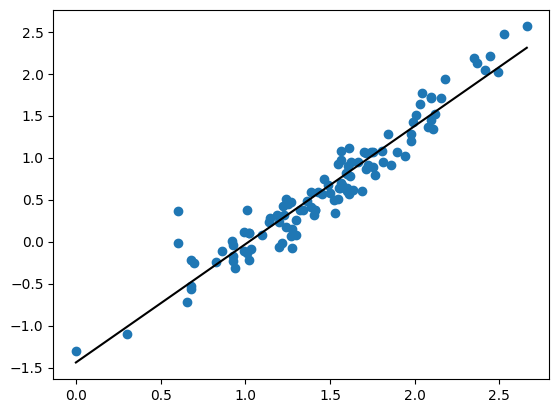

In [23]:
x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 301)
y = beta[0] + beta[1] * x
plt.scatter(np.log10(df["SB"]), np.log10(df["SW"]))
plt.plot(x, y, color = "black");

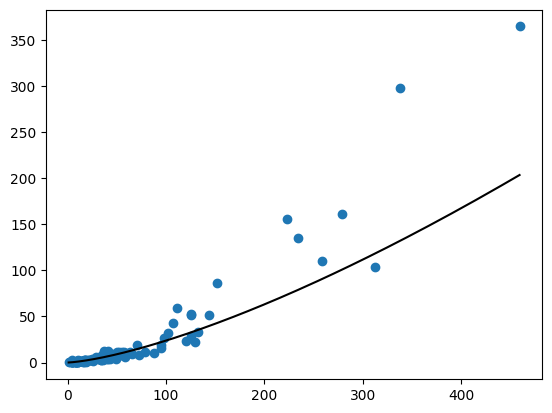

In [24]:
x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 301)
y = 10 ** (beta[0] + beta[1] * x)
plt.scatter(df["SB"], df["SW"])
plt.plot(10 ** x, y, color = "black");

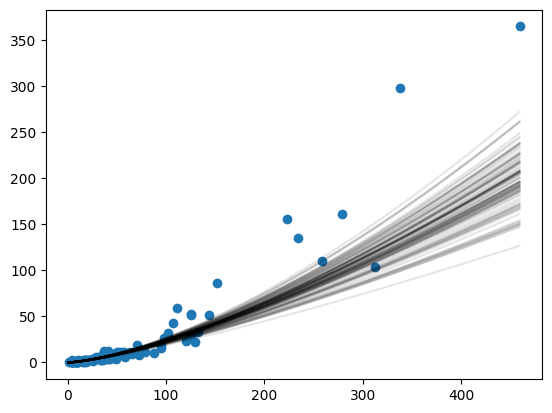

In [32]:
x = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 301)
plt.scatter(df["SB"], df["SW"])
for r in range(R):
    y = 10 ** (betas[r, 0] + betas[r, 1] * x)
    plt.plot(10 ** x, y, color = "black", alpha = 0.1);